# Introduction to Web Scraping with Python

#### CEMFI Undergraduate Summer Internship 2021

#### Instructor: Cay

# Course Outline

1. Introduction: Python and Jupyter Notebooks
1. **Web Scraping Example 1**
1. Web Scraping Example 2

## Section overview

In this part of the course we will

- [Discuss the basics of web browsing and HTML](#Web-browsing-and-scraping)
- [Scrape customer review information from hotels on Tripadvisor](#Scraping-Example:-Tripadvisor-hotels)
    - [Step 1: Visual inspection of website](#Step-1:-Inspect-the-page-to-be-scraped)
    - [Step 2: Send a **request** to the server](#Step-2:-Use-requests-to-receive-HTML-code)
    - [Step 3: Parse the HTML](#Step-3:-Use-BeautifulSoup-to-read-HTML)
    - [Step 4: Find relevant information](#Step-4:-Use-the-find-and-find_all-methods-to-extract-information-from-the-soup)
    - [Step 5: Scale up](#Step-5:-Scale-up-(and-adjust-small-issues))
    - [Step 6: Export data](#Step-6:-Export-the-data)

## Web browsing and scraping

- A browser (Firefox, Safari, Chrome) renders HTML, which is the code used to design webpages.
- To view HTML of a website, we can use the `View Page Source` tool from the browser ([show example](https://www.cemfi.es/)).
- A lot of data is available online and we can use web scraping to obtain this information from the HTML.

### HTML basics

__HTML__ is what is known as a __markup language__. 

That is, HTML is text that has been “marked up” with tags that provide information for the interpreter (which is often a web browser). 

### Simple HTML document

The simplest HTML file consists of:
- `tags` indicating the beginning and end of the whole document.
- and `tags` which identify a `head` and a `body` within that document. 

Information about the file usually goes into the `head`, whereas information that will be displayed on the screen usually goes into the `body`.

**Note:** a Jupyter Notebook cell with `Markdown` type is also able to interpret HTML.

<!DOCTYPE html>
<html>

<head>
<h1>A Simple HTML page</h1>
</head>

<body>

<p>A text editor shows tags.</p>

<p>But a browser knows how to read them.</p>
    
<p>It also knows how to read tables.</p>

<table style=“width=100%”>
 <tr>
	<td>Madrid
	<td>Madrid
	<td>Spain
 </tr>
 <tr>
	<td>A Coruña
	<td>Galicia
	<td>Spain
 </tr>
    <tr>
	<td>Sevilla
	<td>Andalucia
	<td>Spain
 </tr>
  <tr>
	<td>Gijon
	<td>Asturias
	<td>Spain
 </tr>
</table>

</body>

</html>

# Web scraping example

### The internet as a source to explore experience goods

For firms sellling experience goods, **reputation** is extremely valuable since this is one of the primary factors influencing customers' purchasing decisions.

With the expansion of online platforms that allow consumers to rate their experiences with different businesses, the **online reputation** aspect of a firm is becoming ever more relevant.

In this lecture, we focus on a particular kind of experience good, **hotels / accommodation service**. 

### Objective

Let's suppose our goal is to gather data on many hotel listings.

Specifically, we want each hotel's **online reputation and price**.

By **online reputation** I refer to the __number of customer reviews and the average rating__.

### How can we do that?

One option to use the information available in an online travel website.

I will use [Tripadvisor's](https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html) hotel booking section. 

## Step 1: `Inspect` the page to be scraped

Before writing code, it is important to have a look at website we want take information from and check its HTML structure.

To access website information via Python we will need to know the HTML `tags` of the items/variables we want to scrape.

My preferred way for this initial inspection is:
- Navigate to the website you want to scrape.
- Right-click on the item/data you are interested (e.g. reviews, ratings, etc).
- Choose `Inspect`.
- This brings up a windown with the `HTML` of the item that you can use to identify relevant `tags`. 

### Example

Show the steps above on [Tripadvisor's](https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html) for the *name* of a hotel.

The relevant HTML information to reference the name of a hotel is:
- An **`a`** container.
- And the attribute **`class`** with value **`property_title prominent`**

**Note:** this is one option but not the only one. 

## Step 2: Use `requests` to receive HTML code

The Hypertext Transfer Protocol (HTTP) is designed to enable communications between clients and servers.

**Example:** A client (browser) sends an HTTP request to the server and the server returns a *response* to the client. This *response* contains status information about the request and may also contain the requested content.

**Remarks:** 
 - We don't need to know the details of how this process works (we are not web developers).
 - We just need to know how to use them.

### Requests library 

`Requests` is the standard library for making HTTP requests in Python. 

### Installing `requests`

We first need to install it.

In [1]:
# python command to install packages
%pip install requests

Note: you may need to restart the kernel to use updated packages.


Then, we have to `import` the library to use it in the current notebook (or script if you are writing in an IDE).

In [2]:
# Again, in Python we do many imports
import requests

The library `requests` offers many `methods` to be used.

The most common method is `get`, which indicates that you’re trying to get or retrieve data from a specified resource (that's what we want from Tripadvisor). 

To make a `get` request, invoke `requests.get(https://www.example......)`.

In [ ]:
# send a get request to Tripadvisor
url = "https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html"

# try other websites
# Tripadvisor has changed its code, and requests does not work anymore
# the technique taught in the next notebook (selenium) works with Tripadvisor
#url = "https://www.eldiario.es/"

requests.get(url)

But what is this __response__?

It is an object for inspecting the results of the request. 

Let's make the `request` again and store its result in a variable called *result*. 

In [111]:
result = requests.get(url)

Now we can use the variable *`result`* to see information from our `get` request sent to Tripadvisor.

### Status Codes

The most basic information delivered by the `get` request is the **status code**, which indicates whether a specific request has been successfully completed.

For example, a `200` status means that your request was successful!

In [112]:
# check status code
result.status_code

200

There are many other status codes with different meanings.

They have the structure 1xx, 2xx, 3xx, 4xx, etc.

If you ever encounter anything different than 200, check [here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) for its meaning.

**Remark:** one status code that may appear and is important to know is the `403`. 
- `403 Forbidden` indicates that the server understood the request but refuses to authorize it.
- You may get this error because some websites have security features to prevent bots/scaping. 

There are ways to prevent this from happening, but they are beyond the scope of this course (one workaround is discussed [here](https://medium.com/@raiyanquaium/how-to-web-scrape-using-beautiful-soup-in-python-without-running-into-http-error-403-554875e5abed#:~:text=This%20will%20result%20in%20a,security%20features%20to%20prevent%20bots.)).

**DISCLAIMER:** 
- This course does not cover the legal aspect of scraping.
- You should check if there are legal issues before scraping any given webpage (e.g. data limits, commercial use). 
- You may get blocked if the server detects you are trying to scrape large amounts of data.

In [113]:
# send a get reques and check its status code
requests.get("https://www.idealista.com/")

<Response [403]>

### Any questions?

## Step 3: Use `BeautifulSoup` to read HTML

### BeautifulSoup

Beautiful Soup is a Python library for getting data out of HTML and other markup languages. 

As we saw, [Tripadvisor](https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html) displays the data we want on the screen, but does not provide a way of downloading it directly. 

Beautiful Soup helps us pull content from a webpage and remove the HTML markup, leaving only the information we want.

### Installing `BeautifulSoup`

In [114]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


As always, we have to import the library in order to use it.

In [115]:
# that's the standard way to import BeautifulSoup
from bs4 import BeautifulSoup

Remember we saved the response of our `requests.get()` in a variable called `results`.

We already discussed the **status code**, which was OK!

The other crucial piece of information that the `get` request delivers is called **`content`**.

For example, the content of our request is:

In [116]:
# results stores the response of requests.get() and we can see the attribute "content" of this response
print(result.content[ 0 : 1000] )

b'<!DOCTYPE html><html lang="en"><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><link rel="icon" id="favicon" href="https://static.tacdn.com/favicon.ico?v2" type="image/x-icon" /><link rel="mask-icon" sizes="any" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" color="#000000" /><meta name="theme-color" content="#34e0a1" /><meta name="format-detection" content="telephone=no" /><script type="text/javascript">window.taRollupsAreAsync = true;</script><link rel="stylesheet" href="https://static.tacdn.com/css2/webfonts/TripSans/TripSans.css?v1.002" crossorigin><link rel="preload" as="fetch" href="/static/decodeKey.txt" crossorigin="anonymous" /><title>THE 10 BEST Hotels in Madrid for 2021 (from $31) - Tripadvisor</title><meta property="al:ios:app_name" content="TripAdvisor"><meta property="al:ios:app_store_id" content="284876795"><meta property="twitter:app:id:ipad" name="twitter:app:id:ipad" content="284876795"><meta property="tw

We see it has the structure of `HTML` `tags` we discussed previously.

Here is where __BeautifulSoup__ does its trick. 

It is able to *read* this `content` and transform it into a Python object (something Python understands).

In one line of code we can accomplish that. 

In [117]:
# BeautifulSoup parses the HTML content and python now understands the object "soup"
soup = BeautifulSoup(result.content, 'html.parser')

We can print our `soup` using the `prettify` method to improve visibility. 

In [118]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <link href="https://static.tacdn.com/favicon.ico?v2" id="favicon" rel="icon" type="image/x-icon"/>
  <link color="#000000" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" rel="mask-icon" sizes="any"/>
  <meta content="#34e0a1" name="theme-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <script type="text/javascript">
   window.taRollupsAreAsync = true;
  </script>
  <link crossorigin="" href="https://static.tacdn.com/css2/webfonts/TripSans/TripSans.css?v1.002" rel="stylesheet"/>
  <link as="fetch" crossorigin="anonymous" href="/static/decodeKey.txt" rel="preload">
   <title>
    THE 10 BEST Hotels in Madrid for 2021 (from $31) - Tripadvisor
   </title>
   <meta content="TripAdvisor" property="al:ios:app_name"/>
   <meta content="284876795" property="al:ios:app_store_id"/>
   <meta content="284876795" name="twitter:app:i

Now, the identation looks nicer and it is easier to search for what we need.

We can see different attributes of our `soup`. 

For example: 

In [119]:
# this is the same title shown in the browser tab
soup.title

<title>THE 10 BEST Hotels in Madrid for 2021 (from $31) - Tripadvisor</title>

Within `<>` are names of HTML `tags` (above *title* is a `tag`).

In between the start of tag x `<x>` and the end tag x `</x>` is the part rendered as *text*. 

For any object in the `soup` the `.text` method gets rid of `tags` and outputs only the part rendered as *text*.

In [120]:
# text of soup title
soup.title.text

'THE 10 BEST Hotels in Madrid for 2021 (from $31) - Tripadvisor'

### Any questions?

## Step 4: Use the `find` and `find_all` methods to extract information from the soup

The `find` method returns the **first** occurrence of an element *marked* with the parameters we ask it to search for, whereas the `find_all` method returns the set of **all** such elements.

In [121]:
# the first element with the "a" tag (link to flights)
first_a_tag = soup.find("a")

# all "a" objects on the webpage
all_a_tags = soup.find_all("a")

A `.find` delivers a `Tag` object, while a `.find_all` delivers an object called `ResultSet`.

In [122]:
# syntax of find method
type(first_a_tag) , type(all_a_tags)

(bs4.element.Tag, bs4.element.ResultSet)

We can access individual elements of a `ResultSet` with the standard Python index and slice notations:

In [123]:
# the output of find is the same as the first element of the find_all
all_a_tags[0]

<a class="tabLink pid18957" data-title="Flights" href="/CheapFlightsHome" onclick="ta.setEvtCookie('TopNav', 'click', 'Flights', 0, this.href);setPID(1940)">
  
    Flights
      
          </a>

In [124]:
first_a_tag

<a class="tabLink pid18957" data-title="Flights" href="/CheapFlightsHome" onclick="ta.setEvtCookie('TopNav', 'click', 'Flights', 0, this.href);setPID(1940)">
  
    Flights
      
          </a>

And in the same way we loop over *lists*, we can loop over *ResultSets*: 

In [125]:
len(all_a_tags)

384

In [126]:
# you can loop over ResultSets
for idx, value in enumerate(all_a_tags[:20]):
    print(idx, value)

0 <a class="tabLink pid18957" data-title="Flights" href="/CheapFlightsHome" onclick="ta.setEvtCookie('TopNav', 'click', 'Flights', 0, this.href);setPID(1940)">
  
    Flights
      
          </a>
1 <a class="tabLink pid4968" data-title="Vacation Rentals" href="/Rentals" onclick="ta.setEvtCookie('TopNav', 'click', 'VacationRentals', 0, this.href)">
  
    Vacation Rentals
      
          </a>
2 <a class="tabLink pid2973" data-title="Restaurants" href="/Restaurants" onclick="ta.setEvtCookie('TopNav', 'click', 'Restaurants', 0, this.href)">
  
    Restaurants
      
          </a>
3 <a class="tabLink pid39877" data-title="Things to do" href="/Attractions" onclick="ta.setEvtCookie('TopNav', 'click', 'Attractions', 0, this.href)">
  
    Things to do
      
          </a>
4 <a class="subLink" href="/Tourism-g187514-Madrid-Vacations.html">Madrid Tourism</a>
5 <a class="subLink" href="/Hotels-g187514-Madrid-Hotels.html">Madrid Hotels</a>
6 <a class="subLink" href="/Hotels-g187514-c2-Madrid-

### Using `.find` to get the variables we want

For each hotel listed our goal is to retrieve:
- Hotel name
- Number of customer reviews
- Average rating
- Price

### Variable 1: Hotel name

In Step 1 we had already discussed the `tags` with which hotel names are marked.

Below is the HTML code that contains the name of the first hotel listed on the page:

In [127]:
"""
<a target="_blank" href="/Hotel_Review-g187514-d15886984-Reviews-Aloft_Madrid_Gran_Via-Madrid.html" 
id="property_15886984" class="property_title prominent " data-clicksource="HotelName" 
onclick="return false;" dir="ltr">Aloft Madrid Gran Via</a>
"""; # the ";" is only used to suppress output

Note that the object that holds the hotel name starts with the tag `a` (because hotel name is clickable and has a *link* attached to it).

We could try to use `soup.find("a")`, but the line of code below shows that this is not enough to get what we want:

In [128]:
# only one tag is usually not enough
soup.find("a")

<a class="tabLink pid18957" data-title="Flights" href="/CheapFlightsHome" onclick="ta.setEvtCookie('TopNav', 'click', 'Flights', 0, this.href);setPID(1940)">
  
    Flights
      
          </a>

The problem here is that there are other elements tagged with `a`, so the find method delivers the first one that it encounters.

Using `find_all` isn't a good option either because even though it would get hotel names, it would also have several other elements that we are not looking for. 

When we want to access specific elements we need to use more precise search parameters.

### Attributes

In the HTML above, the tag `a` is what is known as a **container**.

Inside a **container**, there are other objects called **attributes**, which hold **values**.

For example, we can check which attributes an object has by using `.attrs`:

In [129]:
# attributes 
soup.find("a").attrs

{'onclick': "ta.setEvtCookie('TopNav', 'click', 'Flights', 0, this.href);setPID(1940)",
 'href': '/CheapFlightsHome',
 'class': ['tabLink', 'pid18957'],
 'data-title': 'Flights'}

To access the object that holds the name of a hotel, we must use an *attribute* and its *value* to narrow down our search.


The syntax is `.find_all("tag",{"attribute":"attribute-value"})`

There are different *attributes* one could use to locate the object we want, a common attribute to use is called *class*, and in our case the object has: `class="property_title prominent"`.

In [130]:
soup.find("a")

<a class="tabLink pid18957" data-title="Flights" href="/CheapFlightsHome" onclick="ta.setEvtCookie('TopNav', 'click', 'Flights', 0, this.href);setPID(1940)">
  
    Flights
      
          </a>

In [131]:
# finding the object with the name of a hotel
soup.find("a",{"class":"property_title prominent"})

<a class="property_title prominent" data-clicksource="HotelName" dir="ltr" href="/Hotel_Review-g187514-d1165950-Reviews-Hostal_Besaya-Madrid.html" id="property_1165950" onclick="return false;" target="_blank">      Hostal Besaya</a>

We can use the `.text` function discussed previously to get rid of tags and attributes and keep only the *text* part, which is what we want.

In [132]:
# finding the object with the name of a hotel
soup.find("a",{"class":"property_title prominent"}).text

'      Hostal Besaya'

We can use the `strip()` method to remove blank spaces in the beginning or end of words.

In [133]:
# remove blanks
soup.find("a",{"class":"property_title prominent"}).text.strip()

'Hostal Besaya'

### Variable 2: Number of reviews

We can apply the exact same strategy we used for hotel names, only changing the **tag** and **attribute** that we pass to `.find`.

In [134]:
# the number of reviews
soup.find("a",{"class":"review_count"}).text

'234 reviews'

We can further manipulate the *text* to make it look nicer:

In [135]:
# only want number
soup.find("a",{"class":"review_count"}).text.replace('reviews','').replace('review','')

'234 '

In [136]:
# only want number
soup.find("a",{"class":"review_count"}).text.replace('reviews','').replace('review','').replace(",", "")

'234 '

In [137]:
# remove useless blanks
soup.find("a",{"class":"review_count"}).text.replace('reviews','').replace('review','').replace(",","").strip()

'234'

### Variable 3: Average rating

To get the *average rating* of a hotel we need to do something slightly different.

We start as usual, by using the `Inspect` tool in the browser. 

The two cells below show the copied HTML for two different hotels.

In [138]:
"""
<a class="ui_bubble_rating bubble_50" alt="5 of 5 bubbles" data-clicksource="BubbleRating" 
onmouseover="widgetEvCall('handlers.showReview', event, this, 514534, true);" 
onclick="widgetEvCall('handlers.reviewCountOnClick', event, this);return false;" 
data-style="max-width:300px;padding:16px;" 
href="/Hotel_Review-g187514-d514534-Reviews-The_Pavilions_Madrid-Madrid.html#REVIEWS" target="_blank"> 
</a>
""";

In [139]:
"""
<a class="ui_bubble_rating bubble_45" alt="4.5 of 5 bubbles" data-clicksource="BubbleRating" 
onmouseover="widgetEvCall('handlers.showReview', event, this, 190569, true);" 
onclick="widgetEvCall('handlers.reviewCountOnClick', event, this);return false;" 
data-style="max-width:300px;padding:16px;" 
href="/Hotel_Review-g187514-d190569-Reviews-The_Westin_Palace_Madrid-Madrid.html#REVIEWS" target="_blank"> 
</a>
""";

Thus, the information on **rating** is in there: 4.5, 5 and so on.

But this information is not rendered as **`text`**.

Note the difference:

In [140]:
# rendered as text
"""
<div class="xxxxxxxxxx" target="xxxxxxxx"> NAME OF HOTEL</div>
""";

In [141]:
# information in the attribute value itself, there is no text at the end
"""
<a class="ui_bubble_rating bubble_45" alt="4.5 of 5 bubbles" data-clicksource="BubbleRating" 
xcxxxxxxx></a>
""";

In this case we cannot do: `soup.find("a",{"class":"ui_bubble_rating bubble_45"}).text`

There is **no text** to get, the information we need is an **attribute value**. 

### Getting attribute values

First: different hotels will have different *value* for the attribute *class* in that specific container:
- ui_bubble_rating bubble_10
- ui_bubble_rating bubble_15
- ...
- ...
- ui_bubble_rating bubble_50

Second: our search parameters need to be **common** across hotels because ultimately we want our code to be able to scrape information from many hotel listings (thus `soup.find("a",{"class":"ui_bubble_rating bubble_45"})` won't work).

**Solution:** one possible solution is to look for some other `attribute` with a *value* that is **common** across all hotels.

**Remark:** this is not be the `attribute` we want to extract the value of.

**Example:**

In our case we want the value of either the attribute `class` (bubble_45) or `alt` (4.5 of 5 bubbles).

If we go back to the HTMLs above for two different hotels we see that `data-clicksource="BubbleRating"` is a good candidate for common valued `attribute`.

We can start by passing the common valued attribute to the `find` method:

In [142]:
# the common HTML in the code above
soup.find("a",{"data-clicksource":"BubbleRating"})

<a alt="4 of 5 bubbles" class="ui_bubble_rating bubble_40" data-clicksource="BubbleRating" data-style="max-width:300px;padding:16px;" href="/Hotel_Review-g187514-d1165950-Reviews-Hostal_Besaya-Madrid.html#REVIEWS" onclick="widgetEvCall('handlers.reviewCountOnClick', event, this);return false;" onmouseover="widgetEvCall('handlers.showReview', event, this, 1165950, true);" target="_blank"> </a>

We can check the attributes this object has with `.attrs`

In [143]:
soup.find("a",{"data-clicksource":"BubbleRating"}).attrs

{'class': ['ui_bubble_rating', 'bubble_40'],
 'alt': '4 of 5 bubbles',
 'data-clicksource': 'BubbleRating',
 'onmouseover': "widgetEvCall('handlers.showReview', event, this, 1165950, true);",
 'onclick': "widgetEvCall('handlers.reviewCountOnClick', event, this);return false;",
 'data-style': 'max-width:300px;padding:16px;',
 'href': '/Hotel_Review-g187514-d1165950-Reviews-Hostal_Besaya-Madrid.html#REVIEWS',
 'target': '_blank'}

What we need can be found either in **class** or **alt** attributes.

To avoid dealing with *commas* or *dots* (e.g. 4.5), I will use **class**.

The following lines of code show how to get the *value* of the **class** *attribute*:

In [144]:
# the value of class
soup.find("a",{"data-clicksource":"BubbleRating"}).attrs['class']

['ui_bubble_rating', 'bubble_40']

In [145]:
# indexing terms like in lists
soup.find("a",{"data-clicksource":"BubbleRating"}).attrs['class'][-1]

'bubble_40'

In [146]:
# further indexing like in lists (strings can be indexed)
soup.find("a",{"data-clicksource":"BubbleRating"}).attrs['class'][-1][-2:]

'40'

### Variable 4: Price

Applying the same reasoning for price we get:

In [147]:
# extract price from the soup
soup.find("div",{"class":"price autoResize"})

<div class="price autoResize" data-clickpart="chevron_price" data-index="0" data-sizegroup="mini-meta-price">€59</div>

In [148]:
# extract price from the soup
soup.find("div",{"class":"price autoResize"}).text

'€59'

In [149]:
# extract price from the soup
soup.find("div",{"class":"price autoResize"}).text.replace("€","").strip()

'59'

We know how to extract from the *soup* the variables we need from each hotel.

Next, we only need to iterate over hotels and get data for each one separately.

### Using `find_all` to loop over all hotels in the soup

As we've seen, the *objects* of the webpage HTML are structured in **tag** *containers* and *attributes*.

**Containers** are like broad sets constituted of smaller elements, its **attributes**.

Bringing this idea to our example: **hotels** can be thought of as *containers* and its characteristics such as **name, number of reviews, etc.** are its attributes.

Moreover, when an object of the website repeats itself many times, the container that holds its information also repeats itself in the HTML.

Thus, one option to achieve our goal is:
1. Look for HTML parameters that contain an entire hotel listing.
1. Use the `find_all` on that container so that each element of our *ResultSet* object is an entire hotel listing.
1. Loop over hotel listings, extracting on each iteration the relevant *attribute value* or *text*.
1. At the end of each iteration save the information on a dictionary or list.

#### The `tag` of a hotel listing

We go to [Tripadvisor](https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html) and use the *inspect* tool to find the relevant tag.

We move up the branches (levels) of the **"tag tree"** up to the point when we notice that the entire information of a hotel listing is within that *container*, and then we right-click and select *copy element*.

**Remark:** as we move the cursor over the inspect window, the items on the website are highlighted in and out indicating the object the `tag` refers to.



**Hotel listing:** we notice the tag has the following initial structure.

In [150]:
"""
<div class="prw_rup prw_meta_hsx_responsive_listing ui_section listItem" 
...........................MANY THINGS.............................
"""; 

**Note:** `<div>` is pretty common to come across and it is used to divide or section off content on a web page.

We now have the `tag` that identifies each hotel.

In [151]:
# get all hotels listings with find_all
hotel_listings = soup.find_all("div",{"class":"prw_rup prw_meta_hsx_responsive_listing ui_section listItem"})

In [152]:
# how many hotels on the page?
len(hotel_listings)

32

Next, our strategy was to loop over elements of the object *hotel_listings*, extracting in each iteration the information we want of a given hotel.

The code below loops over *hotel_listings* extracting hotel *names*, *number of reviews*, *average rating* and *price*.

In [153]:
# loop over hotel in the soup

# create an empty dictionary to store the final information
# it could also be a list, I show both just to exemplify
hotels_info_dict = {}

# find all hotel listings on the soup
hotel_listings = soup.find_all("div",{"class":"prw_rup prw_meta_hsx_responsive_listing ui_section listItem"})

# loop over all hotels on the page
# remember "enumerate" allows us to loop over index and value (e.g. [A,B,C] you can get (0,A),(1,B),(2,C))
# index "i" will be useful for assigning new dictionary keys (entries)
for hotel in hotel_listings:
    
    # take care with identation
       
    # name
    name     = hotel.find("a",{"class":"property_title prominent"}).text.strip()
    
    # number of reviews
    reviews  = hotel.find("a",{"class":"review_count"}).text.replace('reviews','').replace('review','').replace(",","").strip()
    
    # average rating
    rating   = hotel.find("a",{"data-clicksource":"BubbleRating"}).attrs['class'][-1][-2:]
    
    # price
    price    = hotel.find("div",{"class":"price autoResize"}).text.replace("€","").strip()
    
    # before moving on to next iteration, save to dictionary
    hotels_info_dict[name] = [reviews, rating, price]

We can print out our dictionary to check that things make sense. 

In [154]:
# information on hotels 
hotels_info_dict

{'Hostal Besaya': ['234', '40', '59'],
 'Hotel Riu Plaza Espana': ['977', '40', '108'],
 'Catalonia Gran Via': ['286', '40', '99'],
 'Axel Hotel Madrid': ['982', '45', '90'],
 'Pestana Plaza Mayor Madrid': ['407', '45', '134'],
 'Hotel Paseo del Arte': ['2326', '40', '61'],
 'The Pavilions Madrid': ['355', '50', '145'],
 'NH Collection Madrid Eurobuilding': ['2560', '45', '123'],
 'Melia  Castilla': ['4218', '45', '123'],
 'Novotel Madrid Center': ['2418', '40', '84'],
 'Hotel Eurostars Plaza Mayor': ['812', '40', '59'],
 'NH Collection Madrid Gran Via': ['351', '45', '125'],
 'NH Collection Madrid Colon': ['1019', '45', '129'],
 'Oriente Palace Apartments': ['124', '45', '101'],
 'Hotel Madrid Chamartin, affiliated by Melia': ['1644', '40', '64'],
 'Melia Madrid Serrano': ['157', '45', '111'],
 'NH Madrid Nacional': ['1186', '40', '88'],
 'Hotel Nuevo Madrid': ['1636', '40', '45'],
 'Hotel CoolRooms Atocha': ['263', '50', '188'],
 'Vincci Soho': ['2126', '40', '70'],
 'Vincci Soma': [

We could do the same thing storing information on a python `list` instead of a `dictionary`. 

In the end we will have a list of lists.

In [155]:
# empty list to store the final information
hotels_info_list = []

# find all hotel listings on the soup
hotel_listings = soup.find_all("div",{"class":"prw_rup prw_meta_hsx_responsive_listing ui_section listItem"})

# loop over all hotels on the page
# for lists we don't need the "enumerate" function (we use the append function at the end to add information)
for hotel in hotel_listings:
    
    # take care with identation
    
    # name
    name     = hotel.find("a",{"class":"property_title prominent"}).text.strip()
    
    # number of reviews
    reviews  = hotel.find("a",{"class":"review_count"}).text.replace('reviews','').replace('review','').replace(",","").strip()
    
    # average rating
    rating   = hotel.find("a",{"data-clicksource":"BubbleRating"}).attrs['class'][-1][-2:].strip()

    # price
    price    = hotel.find("div",{"class":"price autoResize"}).text.replace("€","").strip()

    # on each iteration .append adds information of one hotel 
    # note that we have a list of lists
    hotels_info_list.append( [name, reviews, rating, price] )

We can print our `list` and verify that it has the same information contained in the `dictionary`.

In [156]:
# the list 
hotels_info_list

[['Hostal Besaya', '234', '40', '59'],
 ['Hotel Riu Plaza Espana', '977', '40', '108'],
 ['Catalonia Gran Via', '286', '40', '99'],
 ['Axel Hotel Madrid', '982', '45', '90'],
 ['Pestana Plaza Mayor Madrid', '407', '45', '134'],
 ['Hotel Paseo del Arte', '2326', '40', '61'],
 ['The Pavilions Madrid', '355', '50', '145'],
 ['NH Collection Madrid Eurobuilding', '2560', '45', '123'],
 ['Melia  Castilla', '4218', '45', '123'],
 ['Novotel Madrid Center', '2418', '40', '84'],
 ['Hotel Eurostars Plaza Mayor', '812', '40', '59'],
 ['NH Collection Madrid Gran Via', '351', '45', '125'],
 ['NH Collection Madrid Colon', '1019', '45', '129'],
 ['Oriente Palace Apartments', '124', '45', '101'],
 ['Hotel Madrid Chamartin, affiliated by Melia', '1644', '40', '64'],
 ['Melia Madrid Serrano', '157', '45', '111'],
 ['NH Madrid Nacional', '1186', '40', '88'],
 ['Hotel Nuevo Madrid', '1636', '40', '45'],
 ['Hotel CoolRooms Atocha', '263', '50', '188'],
 ['Vincci Soho', '2126', '40', '70'],
 ['Vincci Soma', 

Looks good!!

But the idea of scraping is to allow us to extract __large amounts__ of information.

Data on a few hotels only is not enough. 

This takes us to our next *Step*. 

### Any questions?

## Step 5: Scale up (and adjust small issues)

__What we did so far:__ scraped information on all hotels listed on one page.
- More specifically, all hotels listed on the first search page of Tripadvisor hotels in Madrid (page 1).

That's because we used `request.get("https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html")`

By scrolling down the page we note that there are many **more pages** with hotel listings.

Luckily, we can add a simple `outer loop` to our code in order to scrape more hotels (from different page numbers).

The basic idea is to repeat what we did in this last section for each page number 1, 2, 3, .... up to the page we want.

### Looping over pages

If we go back to [Tripadvisor](https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html) we realize that as we move across search pages a **pattern** emerges.

Page 1:  https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html

Page 2:  https://www.tripadvisor.com/Hotels-g187514-oa30-Madrid-Hotels.html

Page 3:  https://www.tripadvisor.com/Hotels-g187514-oa60-Madrid-Hotels.html

...
...
...
...

Page 52: https://www.tripadvisor.com/Hotels-g187514-oa1530-Madrid-Hotels.html

Page 53: https://www.tripadvisor.com/Hotels-g187514-oa1560-Madrid-Hotels.html

#### The pattern across URLs

URLs are the same except for an additional term: `oaNUMBER` in between dashes.

Where `NUMBER` increases by 30 for each subsequent page.

In general, if we want to access page `n`, the number that goes into the URL is `(n-1)*30`.

**Notes (good):** 
- Patters similar to this one happen in other websites as well.
- For example on [Craigslist](https://newyork.craigslist.org/search/cta), we can see a similar feature.
- The term I am calling `NUMBER` relates to the number of listings per page.

**Notes (not so good):** 
- However, it doesn't always work.
- For example, [Linkedin](https://www.linkedin.com/jobs/jobs-in-madrid?trk=homepage-basic_intent-module-jobs&position=1&pageNum=0) has what is called an *infinite scrolling* feature (show on page).
- When you encounter scenarios such as this one, you may need more than just the `requests` library.
- And a good option might be [Selenium](https://selenium-python.readthedocs.io/), a tool that allows you to interact with the page (click on items, scroll down, etc).

### Looping over pages

There are many ways to add an outer loop to our previous code.

Bur regardless of the way we do it, we go from **wide to narrow**.

That is:
- Loop over pages;
    - On each page find all hotels and loop over them;
        - For each hotel, obtain the information we want and save;

One option to get the numbers we need for updating URLs, is to use the `range` function.

In [189]:
# an example of how to get number that iterate from page 1 through page 5

# range (start, end, step)
for x in range(0, 121, 30):
    print(x)

0
30
60
90
120


And to transform these numbers into a full URL we can manipulate strings.

Note that when we use the number zero, the request directs us to the search page number 1, thus we don't need to create a separate code for the first page. 

In [190]:
# creating all the URLs for different page numbers
for x in range(0,91,30):
    url = "https://www.tripadvisor.com/Hotels-g187514-oa" + str(x) + "-Madrid-Hotels.html"
    print(url)

https://www.tripadvisor.com/Hotels-g187514-oa0-Madrid-Hotels.html
https://www.tripadvisor.com/Hotels-g187514-oa30-Madrid-Hotels.html
https://www.tripadvisor.com/Hotels-g187514-oa60-Madrid-Hotels.html
https://www.tripadvisor.com/Hotels-g187514-oa90-Madrid-Hotels.html


The next cell exemplifies how we can scrape hotels from more than one page:

In [159]:
# basic imports
import requests
from bs4 import BeautifulSoup 
 
# extra imports usually useful with scraping
import time
from random import randint

### INPUT: choose number of pages to scrape 
n_pages = 3

# this just controls the time it takes the code to run
start_time = time.time()

# empty list to store the final information
hotels_info = []

# loop over search pages
for x in range(0,  ((n_pages-1)*30)+1   , 30):
    
    # update URL
    url = "https://www.tripadvisor.com/Hotels-g187514-oa" + str(x) + "-Madrid-Hotels.html"    

    # for each url, send request
    result = requests.get(url)

    # prevent disrupting the activity of the website
    # before moving on, the code waits a random number of seconds between 1 and 3
    time.sleep(randint(1,3))

    # parse the HTML content of that page
    soup = BeautifulSoup(result.content, 'html.parser')

    # find all hotel listings on the soup
    hotel_listings = soup.find_all("div",{"class":"prw_rup prw_meta_hsx_responsive_listing ui_section listItem"})

    # loop over all hotels on the page
    for hotel in hotel_listings:

        # take care with identation

        # each item below reproduces what we did previously

        # name
        name     = hotel.find("a",{"class":"property_title prominent"}).text.strip()

        # number of reviews
        reviews  = hotel.find("a",{"class":"review_count"}).text.replace('reviews','').replace('review','').replace(",","").strip()

        # average rating
        rating   = hotel.find("a",{"data-clicksource":"BubbleRating"}).attrs['class'][-1][-2:].strip()

        # price
        price    = hotel.find("div",{"class":"price autoResize"}).text.replace("€","").strip()

        # on each iteration .append adds information of one hotel 
        # note that we have a list of lists
        hotels_info.append([name, reviews, rating, price])


# print time it took to finish
time_elased = time.time() - start_time # now - minus when it started
minutes = int( (time_elased)/60 )      # entire minutes
seconds = time_elased % 60             # % is remainder operator 
print("--- %.0f minutes and %.0f seconds to scrape %.0f listings ---" % ( minutes,seconds,len(hotels_info)) )

--- 0 minutes and 17 seconds to scrape 96 listings ---


And we can check our list:

In [160]:
# 
hotels_info

[['Hostal Besaya', '234', '40', '59'],
 ['Hotel Riu Plaza Espana', '977', '40', '108'],
 ['Catalonia Gran Via', '286', '40', '99'],
 ['Axel Hotel Madrid', '982', '45', '90'],
 ['Pestana Plaza Mayor Madrid', '407', '45', '134'],
 ['Hotel Paseo del Arte', '2326', '40', '61'],
 ['The Pavilions Madrid', '355', '50', '145'],
 ['NH Collection Madrid Eurobuilding', '2560', '45', '123'],
 ['Melia  Castilla', '4218', '45', '123'],
 ['Novotel Madrid Center', '2418', '40', '84'],
 ['Hotel Eurostars Plaza Mayor', '812', '40', '59'],
 ['NH Collection Madrid Gran Via', '351', '45', '125'],
 ['NH Collection Madrid Colon', '1019', '45', '129'],
 ['Oriente Palace Apartments', '124', '45', '101'],
 ['Hotel Madrid Chamartin, affiliated by Melia', '1643', '40', '64'],
 ['Melia Madrid Serrano', '157', '45', '111'],
 ['NH Madrid Nacional', '1186', '40', '88'],
 ['Hotel Nuevo Madrid', '1636', '40', '45'],
 ['Hotel CoolRooms Atocha', '263', '50', '188'],
 ['Vincci Soho', '2125', '40', '70'],
 ['Vincci Soma', 

### Looping over cities

Another dimension over which we can increase the number of hotels we get is the location/city.

We could do it for as many cities as we want, but the time to complete the scrape would increase.

Here, just for the sake of our example, I will do it for three cities: *Madrid, Lisbon, and São João del Rei*.

#### URL of different cities

Searching on [Tripadvisor](https://www.tripadvisor.com), we see that the URLs for hotels in these cities are (these are for search page number 2):
- Madrid: https://www.tripadvisor.com/Hotels-g187514-Madrid-Hotels.html
- Lisbon: https://www.tripadvisor.com/Hotels-g189158-Lisbon_Lisbon_District_Central_Portugal-Hotels.html
- Sao Joao del Rei: https://www.tripadvisor.com/Hotels-g737099-Sao_Joao_del_Rei_State_of_Minas_Gerais-Hotels.html

We note that across cities, URLs vary in terms of:
- A six digit number as in `gXXXXXX`.
- And the written description of the place, for example `Lisbon_Lisbon_District_Central_Portugal`.

Knowing what we already know about `loops`, there are many ways to construct a loop over cities and page numbers.

Below is one possibility:

In [191]:
# list of lists to capture city code and name that go into the Tripadvisor url
cities_url = [ ['g187514','Madrid']                                   , 
               ['g189158','Lisbon_Lisbon_District_Central_Portugal']  ,
               ['g737099','Sao_Joao_del_Rei_State_of_Minas_Gerais']                               ] 

# print first two pages of each city just to illustrate
n_pages = 2

#
for city in cities_url:
    for x in range(0, ((n_pages-1)*30)+1 ,30):
        # the URL in the format above
        url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-oa" + str(x) + "-" + city[1] + "-Hotels.html"
        print(url)
        # the city name to be saved in the final spreadsheet
        city_code = city[1][0:3].upper()
        print(city_code)

https://www.tripadvisor.com/Hotels-g187514-oa0-Madrid-Hotels.html
MAD
https://www.tripadvisor.com/Hotels-g187514-oa30-Madrid-Hotels.html
MAD
https://www.tripadvisor.com/Hotels-g189158-oa0-Lisbon_Lisbon_District_Central_Portugal-Hotels.html
LIS
https://www.tripadvisor.com/Hotels-g189158-oa30-Lisbon_Lisbon_District_Central_Portugal-Hotels.html
LIS
https://www.tripadvisor.com/Hotels-g737099-oa0-Sao_Joao_del_Rei_State_of_Minas_Gerais-Hotels.html
SAO
https://www.tripadvisor.com/Hotels-g737099-oa30-Sao_Joao_del_Rei_State_of_Minas_Gerais-Hotels.html
SAO


### How many pages do we want to scrape?

This is up to the researcher, depends on the case.

**Notes:** 
- When scraping from platforms that aggregate businesses/sellers (e.g. Tripadvisor, Yelp, Amazon, etc.), the last ones to appear on the search usually have little information.
- And since scraping takes time, we usually want to take a look at the website first to check if all data is relevant. 

Check the last pages of hotel listings to verify that there is not much usefulness in scraping them.

In any case, the amount of information one wants to scrape will depend on the application and the trade-off between execution time and amount of data.

#### Cities with different number of pages

We already know how to scrape *X* number of pages per city.

But once we start dealing with cities with a very different number of hotels, a given page number may not be general enough to our purposes. 

**Example**: 
- SJDR has very few hotels listed (only 3 pages).
- So if we set our code to scrape 4 (or more) pages per city we would have problems.
- Passing to the `request.get(url)` a page number larger than the real maximum number of pages will either result in error or wasted time (it loads the first page and we scrape the same hotels repeatedly).

#### A natural solution

We can add to our code a feature to identify the number of search pages a city has and use this as a guide for how many pages we want to scrape for that city.

The code below shows one way to do that:

In [192]:
# list of lists to capture city code and name that go into the Tripadvisor url
cities_url = [ ['g187514','Madrid']                                   , 
               ['g189158','Lisbon_Lisbon_District_Central_Portugal']  ,
               ['g737099','Sao_Joao_del_Rei_State_of_Minas_Gerais']                               ] 

#
for city in cities_url:

    # use first page to look for number of pages that city has
    url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-" + city[1] + "-Hotels.html"
    
    # send request
    result = requests.get(url)
    
    # parse the HTML content of that page
    soup = BeautifulSoup(result.content, 'html.parser')
    
    # identify number of pages
    n_pages = int(soup.find("div",{"class":"unified ui_pagination standard_pagination ui_section listFooter"}).attrs['data-numpages'].strip())
    
    # Print on screen to show that the code does what we want
    n_on_url = ((n_pages-1)*30)
    url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-oa" + str(n_on_url) + "-" + city[1] + "-Hotels.html"
    city_code = city[1][0:3].upper()
    print("For city code %s we can scrape up to search page %s, with url:\n %s" % (city_code, n_pages, url) ) 

For city code MAD we can scrape up to search page 53, with url:
 https://www.tripadvisor.com/Hotels-g187514-oa1560-Madrid-Hotels.html
For city code LIS we can scrape up to search page 66, with url:
 https://www.tripadvisor.com/Hotels-g189158-oa1950-Lisbon_Lisbon_District_Central_Portugal-Hotels.html
For city code SAO we can scrape up to search page 3, with url:
 https://www.tripadvisor.com/Hotels-g737099-oa60-Sao_Joao_del_Rei_State_of_Minas_Gerais-Hotels.html


### Put it all together 

In the cell below I put together our previous code with the last two outer loops that scale up our code.

With what have so far we can scrape all hotels from all pages that each of the cities has available.

But this would take several minutes and just to exemplify here in class, I will add the following modification:
- Check the number of pages a city has.
- If this number is 3 or below, we scrape all (SAO).
- If it is greater than 3, we only scrape the first 3 pages for that city (MAD, LIS).

In [163]:
# basic imports
import requests
from bs4 import BeautifulSoup 
 
# extra imports usually useful with scraping
import time
from random import randint

# this just controls the time it takes the code to run
start_time = time.time()

# empty list to store the final information
hotels_info = []

# list of lists to capture city code and name that go into the Tripadvisor url
cities_url = [ ['g187514','Madrid']                                   , 
               ['g189158','Lisbon_Lisbon_District_Central_Portugal']  ,
               ['g737099','Sao_Joao_del_Rei_State_of_Minas_Gerais']                               ] 

# loop over cities
for city in cities_url:
    
    # store city code to save as variable at the end
    city_code = city[1][0:3].upper()
    
    # use first page to look for number of pages that city has
    url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-" + city[1] + "-Hotels.html"
    # send request
    result = requests.get(url)
    # parse the HTML content of that page
    soup = BeautifulSoup(result.content, 'html.parser')
    
    # identify number of pages
    n_pages = int(soup.find("div",{"class":"unified ui_pagination standard_pagination ui_section listFooter"}).attrs['data-numpages'].strip())
    # to save time we only scrape a max of 3 pages per city
    # we only need to remove the two lines below in order to scrape all hotels of each city
    if n_pages>3:
        n_pages=3
    
    # loop over search pages
    for x in range(0, ((n_pages-1)*30)+1 ,30):
        
        # the URL in the format above
        url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-oa" + str(x) + "-" + city[1] + "-Hotels.html"
        
        # for each url, send request
        result = requests.get(url)

        # prevent disrupting the activity of the website: waits a random number of seconds between 1 and 3
        time.sleep(randint(1,3))

        # parse the HTML content of that page
        soup = BeautifulSoup(result.content, 'html.parser')

        # find all hotel listings on the soup
        hotel_listings = soup.find_all("div",{"class":"prw_rup prw_meta_hsx_responsive_listing ui_section listItem"})

        # loop over all hotels on the page
        for hotel in hotel_listings:

            # name
            name     = hotel.find("a",{"class":"property_title prominent"}).text.strip()

            # number of reviews
            reviews  = hotel.find("a",{"class":"review_count"}).text.replace('reviews','').replace('review','').replace(",","").strip()
            
            # average rating
            rating   = hotel.find("a",{"data-clicksource":"BubbleRating"}).attrs['class'][-1][-2:].strip()
            
            # price
            price    = hotel.find("div",{"class":"price autoResize"}).text.replace("€","").strip()

            # on each iteration .append adds information of one hotel 
            hotels_info.append([name, reviews, rating, price, city_code])
            
# print time it took to finish
time_elased = time.time() - start_time # now - minus when it started
minutes = int( (time_elased)/60 )      # entire minutes
seconds = time_elased % 60             # % is remainder operator 
print("--- %.0f minutes and %.0f seconds to scrape %.0f hotel listings ---" % ( minutes,seconds,len(hotels_info)) )

AttributeError: 'NoneType' object has no attribute 'attrs'

We get an **error** message. Why?

### Final adjustments (1): handling missing information

It is common to have errors that only show up when you scale up the code.

It had worked before for pages 1 through 3 in Madrid, so the problem must be somewhere else.

The *error* is: `'NoneType' object has no attribute 'attrs'`.

Problems similar to this one are pretty common with scraping and they have to do with missing information.

Let's have a look at the objects we had going right before the error ocurred.


In [164]:
# our URL when the error ocurred was
url # the problem was in the city Sao Joao del Rei

'https://www.tripadvisor.com/Hotels-g737099-oa0-Sao_Joao_del_Rei_State_of_Minas_Gerais-Hotels.html'

In [165]:
# name when error occurred
name

'Pousada Efraim'

If you navigate to the Tripadvisor page of this hotel you'll notice it has ZERO reviews.

Understably, hotels with **zero reviews** don't have the HTML tag for **ratings**:
- They still have the HTML for reviews, for which the text is "0".
- But our find method delivers a `None` object when it searches for ratings (whenever the parameters - tag and attribute - of a `.find()` method are not found in the source html code, the output is a `None` object).

We can see this clearly by asking for each object separetely and priting the result.

In [166]:
# "class":"property_title prominent" and "class":"review_count" can be found

# name
hotel_name     = hotel.find("a",{"class":"property_title prominent"})

# number of reviews
reviews        = hotel.find("a",{"class":"review_count"})

# average rating
rating         = hotel.find("a",{"data-clicksource":"BubbleRating"})

In [167]:
# name is fine
print(hotel_name, "\n")
print(hotel_name.text.strip())

<a class="property_title prominent" data-clicksource="HotelName" dir="ltr" href="/Hotel_Review-g737099-d13980338-Reviews-Pousada_Efraim-Sao_Joao_del_Rei_State_of_Minas_Gerais.html" id="property_13980338" onclick="return false;" target="_blank">      Pousada Efraim</a> 

Pousada Efraim


In [168]:
# number of reviews is fine
print(reviews, "\n")
print(reviews.text.replace('reviews','').replace('review','').replace(",","").strip())

<a class="review_count unclickable" data-clicksource="ReviewCount" data-style="max-width:300px;padding:16px;" onclick="widgetEvCall('handlers.reviewCountOnClick', event, this);return false;" onmouseover="widgetEvCall('handlers.showReview', event, this, 13980338, true);" target="_blank">0 reviews</a> 

0


In [169]:
# problem is here
print(rating, "\n")
print(rating.attrs['class'][-1][-2:].strip())

None 



AttributeError: 'NoneType' object has no attribute 'attrs'

In [ ]:
# problem is not exclusive of attrs; with .text or any other method the problem would persist
print(rating, "\n")
print(rating.text)

**Remark:** whenever the `find` method delivers a `None` object, we will get an **error** if we apply any `.function` on it.

### Solution

As we've seen above, when the `find` method delivers `None` it means that for that listing, this piece of information is unavailable.

Thus, it makes sense to assign a *missing* or *empty* for that variable (simply `x = ""`).

Below is one way to adapt our code to do that:

In [170]:
# like this we get no errors and assing missing (empty) when variable does exists
rating_tag   = hotel.find("a",{"data-clicksource":"BubbleRating"})
rating       = rating_tag.attrs['class'][-1][-2:].strip() if rating_tag else ""
print(rating)

**Remarks:** 
- It is good practice to adopt the structure above to all variables.
- That's because it is not uncommon to have one item (e.g. hotel listing) with missing tag for one variable only (e.g. price).
- If we don't follow the structure above the whole code will brake because of one item only.
- **Examples:** 
    - A job posting missing the salary field;
    - A rental listing missing the square meters field;
    - Etc, ect....

The cell below adapts the code to handle missing information and it should run all the way through.

In [171]:
# basic imports
import requests
from bs4 import BeautifulSoup 
 
# extra imports usually useful with scraping
import time
from random import randint

# this just controls the time it takes the code to run
start_time = time.time()

# empty list to store the final information
hotels_info = []

# list of lists to capture city code and name that go into the Tripadvisor url
cities_url = [ ['g187514','Madrid']                                   , 
               ['g189158','Lisbon_Lisbon_District_Central_Portugal']  ,
               ['g737099','Sao_Joao_del_Rei_State_of_Minas_Gerais']                               ] 

# loop over cities
for city in cities_url:
    
    # store city code to save as variable at the end
    city_code = city[1][0:3].upper()
    
    # use first page to look for number of pages that city has
    url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-" + city[1] + "-Hotels.html"
    
    # send request
    result = requests.get(url)
     
    # parse the HTML content of that page
    soup = BeautifulSoup(result.content, 'html.parser')
    
    # identify number of pages
    n_pages = int(soup.find("div",{"class":"unified ui_pagination standard_pagination ui_section listFooter"}).attrs['data-numpages'].strip())
    
    # to save time we only scrape a max of 4 pages per city
    # we only need to remove the two lines below in order to scrape all hotels of each city
    if n_pages>3:
        n_pages=3
    
    # loop over search pages
    for x in range(0, ((n_pages-1)*30)+1 ,30):
                
        # the URL in the format above
        url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-oa" + str(x) + "-" + city[1] + "-Hotels.html"
        
        # for each url, send request
        result = requests.get(url)

        # prevent disrupting the activity of the website: waits a random number of seconds between 1 and 3
        time.sleep(randint(1,3))

        # parse the HTML content of that page
        soup = BeautifulSoup(result.content, 'html.parser')

        # find all hotel listings on the soup
        hotel_listings = soup.find_all("div",{"class":"prw_rup prw_meta_hsx_responsive_listing ui_section listItem"})

        # loop over all hotels on the page
        for hotel in hotel_listings:

            # name
            name_tag    = hotel.find("a",{"class":"property_title prominent"})
            name        = name_tag.text.strip() if name_tag else ""
            
            # number of reviews
            reviews_tag = hotel.find("a",{"class":"review_count"})
            reviews     = reviews_tag.text.replace('reviews','').replace('review','').replace(",","").strip() if reviews_tag else ""

            # average rating
            rating_tag  = hotel.find("a",{"data-clicksource":"BubbleRating"})
            rating      = rating_tag.attrs['class'][-1][-2:].strip() if rating_tag else ""

            # price
            price_tag   = hotel.find("div",{"class":"price autoResize"})
            price       = price_tag.text.replace("€","").strip() if price_tag else ""

            # on each iteration .append adds information of one hotel 
            hotels_info.append([name, reviews, rating, price, city_code])
            
# print time it took to finish
time_elased = time.time() - start_time # now - minus when it started
minutes = int( (time_elased)/60 )      # entire minutes
seconds = time_elased % 60             # % is remainder operator 
print("--- %.0f minutes and %.0f seconds to scrape %.0f hotel listings ---" % ( minutes,seconds,len(hotels_info)) )

--- 0 minutes and 51 seconds to scrape 268 hotel listings ---


In [172]:
# see our final list
hotels_info[-10:]

[['Pousada Do Bed Breakfest', '0', '', '', 'SAO'],
 ['Grande Hotel Sinha Baptista', '0', '', '', 'SAO'],
 ['Pousada Fazenda Pinheiros', '0', '', '', 'SAO'],
 ['Hotel Herivelto', '0', '', '', 'SAO'],
 ['Hotel le Jardin', '0', '', '', 'SAO'],
 ['Pousada Primavera', '10', '30', '', 'SAO'],
 ['Santa Cruz Hotel', '11', '35', '', 'SAO'],
 ['Barroco Hostel', '26', '40', '', 'SAO'],
 ['Casa de Nara', '0', '', '', 'SAO'],
 ['Hostel Pouso Real', '0', '', '', 'SAO']]

In [173]:
# does the number of hotels scraped make sense?
len(hotels_info) 

268

### Final adjustment 2: repeated listings

Everything looks good, but we can still add one last adjustment.

In theory, we should be getting unique hotel listings:
- We are looping over different page numbers of different cities.

But the lines of code below suggest that we are getting repeated listings.

In [174]:
# how many listings did we scrape?
len(hotels_info)

268

Now I remove duplicate entries using the following rule:
- If a listing has the same *name, number of reviews, average rating, price and city*, then I consider it a duplicate.

**Note:** 
- This solution is not **foolproof** (possible to have same name in two different addresses in the same city).
- But unlikely to have same number of reviews and average rating as well!

In [175]:
# removing duplicates  
hotels_info_unique = []
#
for i in hotels_info: 
    if i not in hotels_info_unique: 
        hotels_info_unique.append(i)

In [176]:
# listings remaining
len(hotels_info_unique)

264

#### Why there may be repeated listings?

Two reasons:
1. Sponsored listings.
1. Search pages are dynamic and rankings change constantly.

# Step 6: Export the data

Our list called *hotels_info* has everything we wanted, but to conduct analysis we usually want to have data in a spreadsheet format.

The standard way to see data in spreadsheet style in Python is to use [Pandas](https://pandas.pydata.org/).

As usual, we `import` before using it. 

In [177]:
# usual way to import pandas
import pandas as pd

In [178]:
# transform our list into a Pandas dataframe object
df = pd.DataFrame(hotels_info_unique, columns=['hotel_name', 'n_reviews', 
                                               'rating', 'price', 'city'] )

And that's how a spreadsheet looks like if use want to conduct your analysis in Python.

In [179]:
df

,hotel_name,n_reviews,rating,price,city
0,Hotel Riu Plaza Espana,977,40,108,MAD
1,Catalonia Gran Via,286,40,99,MAD
2,Axel Hotel Madrid,982,45,90,MAD
3,Pestana Plaza Mayor Madrid,407,45,134,MAD
4,Hotel Paseo del Arte,2324,40,61,MAD
...,...,...,...,...,...
259,Pousada Primavera,10,30,,SAO
260,Santa Cruz Hotel,11,35,,SAO
261,Barroco Hostel,26,40,,SAO
262,Casa de Nara,0,,,SAO


In [180]:
# another way to quickly inspect data
df.head() # or 
#df.tail()

,hotel_name,n_reviews,rating,price,city
0,Hotel Riu Plaza Espana,977,40,108,MAD
1,Catalonia Gran Via,286,40,99,MAD
2,Axel Hotel Madrid,982,45,90,MAD
3,Pestana Plaza Mayor Madrid,407,45,134,MAD
4,Hotel Paseo del Arte,2324,40,61,MAD


From here, we could carry out some quick visual analysis.

In [181]:
# transform to nummeric (we collected them as strings)
df['rating']    = pd.to_numeric(df['rating'])/10 # to scale from 1 to 5
df['n_reviews'] = pd.to_numeric(df['n_reviews'])
df['price']     = pd.to_numeric(df['price'])

In [182]:
# average over hotels
print("Average number of reviews is: ", "{:.2f}".format(df['n_reviews'].mean()))
print("Average rating is: ",            "{:.2f}".format(df['rating'].mean()))
print("Average price is: ",            "{:.2f}".format(df['price'].mean()))

Average number of reviews is:  752.47
Average rating is:  4.25
Average price is:  87.49


In [183]:
# average by city
df.groupby('city').mean()

,n_reviews,rating,price
city,,,
LIS,888.739130,4.336957,102.902174
MAD,1223.858696,4.255435,86.725275
SAO,53.662500,4.119048,35.653846


#### Quick visual inspection of the data

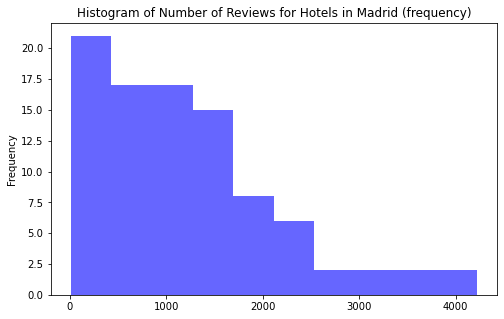

In [184]:
# visual inspection of one distribution

# import plot library
import matplotlib.pyplot as plt

# data for each histogram
mad = df.loc[ df.city=='MAD'   , 'n_reviews']

# that's how to start a figure in matplotlib
fig, ax = plt.subplots(figsize=(8,5))

#
kwargs = dict(alpha=0.6)

#
ax.hist(mad, **kwargs, color='b')
plt.gca().set(title='Histogram of Number of Reviews for Hotels in Madrid (frequency)', ylabel='Frequency');

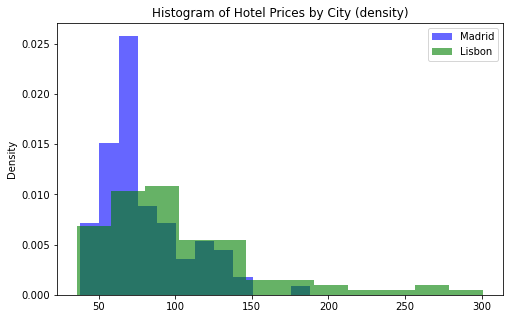

In [185]:
# visual inspection of two distributions

# import plot library
import matplotlib.pyplot as plt

# data for each histogram
lis = df.loc[(df.city=='LIS') & (df.price<500)    , 'price']
mad = df.loc[(df.city=='MAD')  & (df.price<500)    , 'price']

# that's how to start a figure in matplotlib
fig, ax = plt.subplots(figsize=(8,5))

#
kwargs = dict(alpha=0.6, bins=12)

#
ax.hist(mad, **kwargs, color='b', label='Madrid', density=True)
ax.hist(lis, **kwargs, color='g', label='Lisbon', density=True)
plt.gca().set(title='Histogram of Hotel Prices by City (density)', ylabel='Density')
plt.legend();

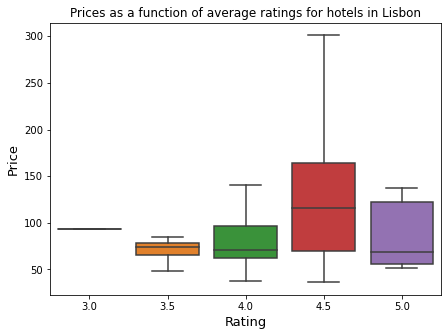

In [186]:
import seaborn as sns

# that's how to start a figure in matplotlib
fig, ax = plt.subplots(figsize=(7,5))


ax = sns.boxplot(x="rating", y="price", 
            data=df.loc[(df.city=='LIS')  & (df.n_reviews>200)]
            , showfliers = False);

ax.set_xlabel("Rating", size=13);
ax.set_ylabel("Price", size=13);
ax.set_title("Prices as a function of average ratings for hotels in Lisbon");

There are many more things we could do with the data, but that's for another course.

The last thing we need to do is to export the data to a standard format.

That way, you would have the data safely stored and could analyze later on another software.

The standard way to export a `pandas` dataframe to `csv` is: 

In [187]:
# export the dataframe as csv in the same folder where the notebook is running
df.to_csv('hotel_reviews.csv', index=False)

In [188]:
# export to any chosen path
path = "/Users/cayrua/Desktop/"
file_name = "hotel_reviews.csv"

df.to_csv(path + file_name, index=False)

If you work on Windows, remember to use either `\\` or `r` before the *path*.

For example, like this:

    r"C:\Users\c-chav30\Documents\hotel_reviews.csv"

Now we can navigate to where we saved the file and open it on Excel just to inspect if things look good!

## Entire code in one cell

Below is our final scraping code in a single cell.

You can play around with the number of pages per city you want to scrape:
- All pages, a fixed number, half of the total, etc.

In [99]:
# basic imports
import requests
from bs4 import BeautifulSoup 
import pandas as pd
 
# extra imports usually useful with scraping
import time
from random import randint

# max pages per city
max_pages = 100


# this just controls the time it takes the code to run
start_time = time.time()

# empty list to store the final information
hotels_info = []

# list of lists to capture city code and name that go into the Tripadvisor url
cities_url = [ ['g187514','Madrid']                                   , 
               ['g189158','Lisbon_Lisbon_District_Central_Portugal']  ,
               ['g737099','Sao_Joao_del_Rei_State_of_Minas_Gerais']                               ] 

# loop over cities
for city in cities_url:
    
    # store city code to save as variable at the end
    city_code = city[1][0:3].upper()
    
    # use first page to look for number of pages that city has
    url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-" + city[1] + "-Hotels.html"
    
    # send request
    result = requests.get(url)
     
    # parse the HTML content of that page
    soup = BeautifulSoup(result.content, 'html.parser')
    
    # identify number of pages
    n_pages = int(soup.find("div",{"class":"unified ui_pagination standard_pagination ui_section listFooter"}).attrs['data-numpages'].strip())
    
    # to save time we only scrape a max of 4 pages per city
    # we only need to remove the two lines below in order to scrape all hotels of each city
    if n_pages>max_pages:
        n_pages=max_pages
    
    # loop over search pages
    for x in range(0, ((n_pages-1)*30)+1 ,30):
                
        # the URL in the format above
        url = "https://www.tripadvisor.com/Hotels-" + city[0] + "-oa" + str(x) + "-" + city[1] + "-Hotels.html"
        
        # for each url, send request
        result = requests.get(url)

        # prevent disrupting the activity of the website: waits a random number of seconds between 1 and 3
        time.sleep(randint(1,3))

        # parse the HTML content of that page
        soup = BeautifulSoup(result.content, 'html.parser')

        # find all hotel listings on the soup
        hotel_listings = soup.find_all("div",{"class":"prw_rup prw_meta_hsx_responsive_listing ui_section listItem"})

        # loop over all hotels on the page
        for hotel in hotel_listings:

            # name
            name_tag    = hotel.find("a",{"class":"property_title prominent"})
            name        = name_tag.text.strip() if name_tag else ""
            
            # number of reviews
            reviews_tag = hotel.find("a",{"class":"review_count"})
            reviews     = reviews_tag.text.replace('reviews','').replace('review','').replace(",","").strip() if reviews_tag else ""

            # average rating
            rating_tag  = hotel.find("a",{"data-clicksource":"BubbleRating"})
            rating      = rating_tag.attrs['class'][-1][-2:].strip() if rating_tag else ""

            # price
            price_tag   = hotel.find("div",{"class":"price autoResize"})
            price       = price_tag.text.replace("€","").strip() if price_tag else ""

            # on each iteration .append adds information of one hotel 
            hotels_info.append([name, reviews, rating, price, city_code])


# removing duplicates  
hotels_info_unique = []
#
for i in hotels_info: 
    if i not in hotels_info_unique: 
        hotels_info_unique.append(i)

        
# Export as csv

# 1. to dataframe
# transform our list into a Pandas dataframe object
df = pd.DataFrame(hotels_info_unique, columns=['hotel_name', 'n_reviews', 'rating', 'price', 'city'] )
# 2. to csv
df.to_csv('/Users/cayrua/Desktop/hotel_reviews_full.csv', index=False)

# print time it took to finish
time_elased = time.time() - start_time # now - minus when it started
minutes = int( (time_elased)/60 )      # entire minutes
seconds = time_elased % 60             # % is remainder operator 
print("--- %.0f minutes and %.0f seconds to scrape %.0f hotel listings, %.0f of which were unique  ---" 
      % ( minutes, seconds, len(hotels_info),len(hotels_info_unique) ) )

--- 10 minutes and 26 seconds to scrape 3735 hotel listings, 2808 of which were unique  ---


In [105]:
df.shape

(2808, 5)

In [106]:
df.head()

,hotel_name,n_reviews,rating,price,city
0,The Pavilions Madrid,355,0.050,145,MAD
1,Hotel Riu Plaza Espana,977,0.040,108,MAD
2,Catalonia Gran Via,286,0.040,99,MAD
3,Axel Hotel Madrid,982,0.045,90,MAD
4,Pestana Plaza Mayor Madrid,407,0.045,134,MAD


In [107]:
df.tail()

,hotel_name,n_reviews,rating,price,city
2803,Pousada Primavera,10,0.030,,SAO
2804,Santa Cruz Hotel,11,0.035,,SAO
2805,Barroco Hostel,26,0.040,,SAO
2806,Casa de Nara,0,NaN,,SAO
2807,Hostel Pouso Real,0,NaN,,SAO
